In [1]:
from strat.create_dataset import dataset, prepare_imputation
from strat.run_rcv import RCV
import strat.utils as ut
import logging
logging.basicConfig(format='%(asctime)s %(levelname)s: %(message)s',
                    level=logging.INFO, datefmt='%I:%M:%S')

In [2]:
vineland, demo_info = dataset(ut.instrument_dict, ut.phenotype_file, phenotype='autism', ptype=2, save=True)

06:17:11 INFO: Select individuals with autism and save demographic info.
06:17:38 INFO: Number of subjects with autism: 17772


06:17:38 INFO: Loading datasets:
06:17:38 INFO: vinelandsurvey_200505
06:17:41 INFO: Read table vinelandsurvey_200505 -- N subjects (unique): 2872 (1513)

06:17:41 INFO: vinelandparent_200503
06:17:42 INFO: Read table vinelandparent_200503 -- N subjects (unique): 1904 (1290)

06:17:42 INFO: vinland301
06:17:42 INFO: Read table vinland301 -- N subjects (unique): 1818 (445)

06:17:42 INFO: Processing VINELAND
06:17:44 INFO: Dropped 102 observations with completely missing information
06:17:44 INFO: Dropped 1715 duplicated observations
06:17:44 INFO: Current number of observation: 4777




In [3]:
rcv_method = RCV(ptype=2, include_age=('P1', 'P2'), trts_perc=0.45)

06:17:49 INFO: Percentage of missing information for each feature:
{'communicationdomain_totalb': 0.005233410090014654, 'livingskillsdomain_totalb': 0.1980322378061545, 'socializationdomain_totalb': 0.007745446933221687, 'composite_totalb': 0.025329704835670923, 'receptive_vscore': 0.18086665271090643, 'expressive_vscore': 0.18002930709650408, 'personal_vscore': 0.19238015490893867, 'domestic_vscore': 0.20598702114297676, 'community_vscore': 0.20473100272137323, 'interprltn_vscore': 0.20452166631777266, 'playleis_vscore': 0.18358802595771403, 'copingskill_vscore': 0.2051496755285744}
Average - Min/Max percentage of missing informtion per subject:0.1494661921708185 - 0.0/0.9166666666666666
06:17:49 INFO: Threshold set at: 0.35
06:17:49 INFO: Dropped 893
06:17:50 INFO: Number of subjects at P1: 1025
06:17:50 INFO: Number of subjects in training set: 563
06:17:50 INFO: Number of subjects in test set: 462
06:17:50 INFO: Number of subjects at P2: 1061
06:17:50 INFO: Number of subjects in tr

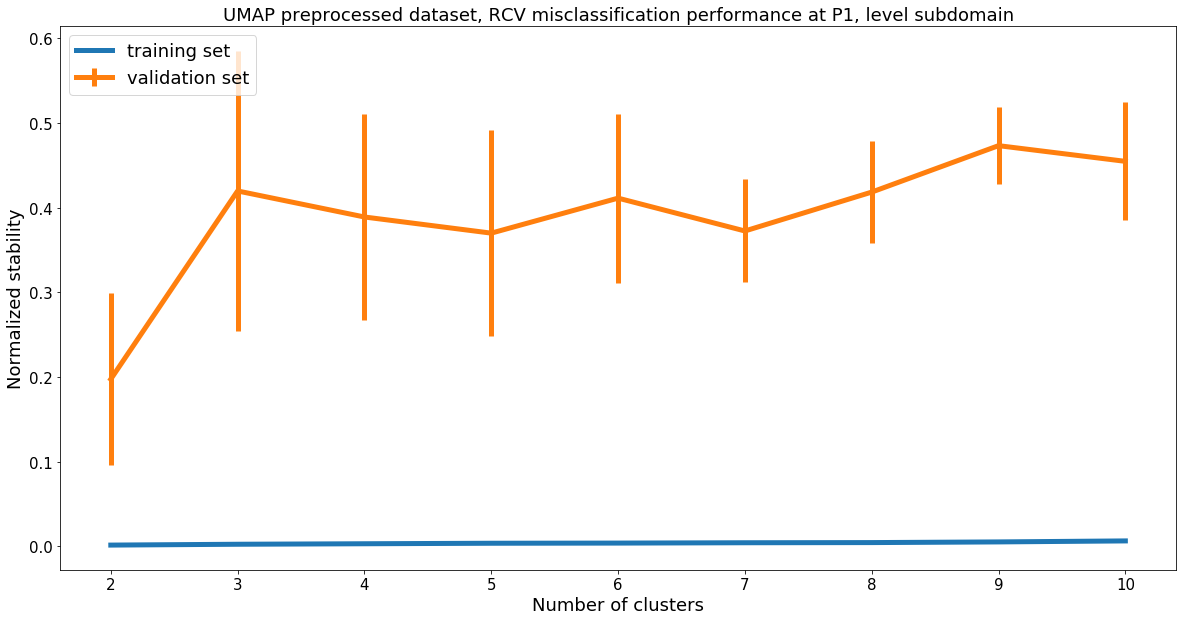

Loading BokehJS ...

Loading BokehJS ...

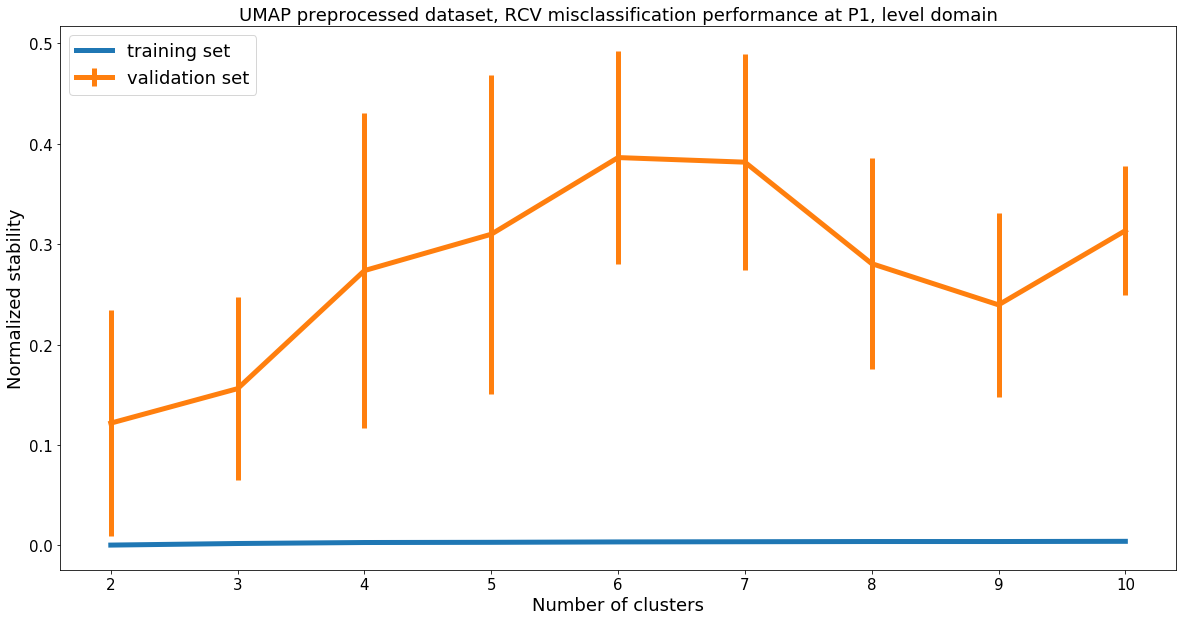

06:18:54 INFO: Best number of clusters: 2
06:18:54 INFO: Training ACC: 0.9964476021314387, Test ACC: 0.7012987012987013


Loading BokehJS ...

Loading BokehJS ...

06:19:25 INFO: Best number of clusters: 3
06:19:25 INFO: Training ACC: 1.0, Test ACC: 0.9435146443514645


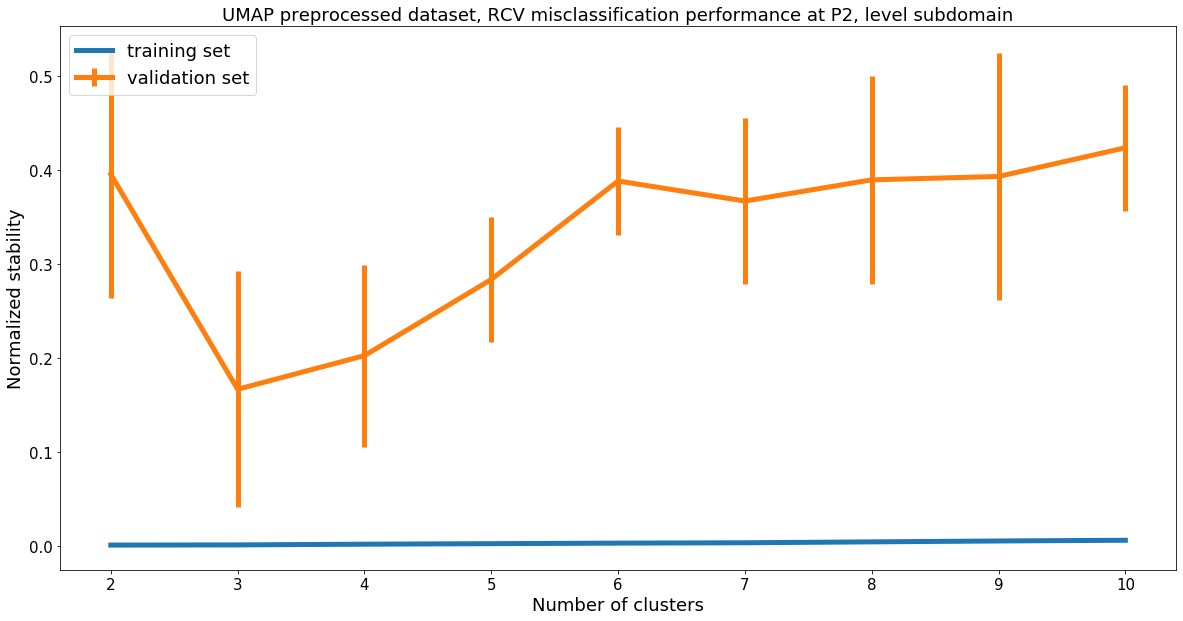

Loading BokehJS ...

Loading BokehJS ...

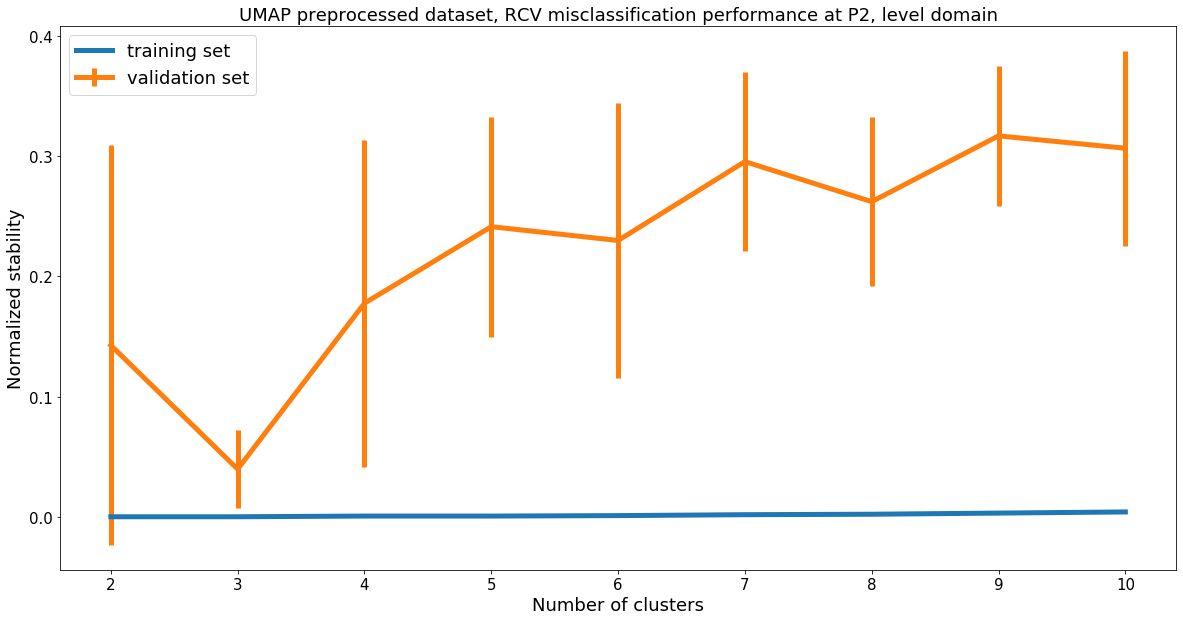

06:19:57 INFO: Best number of clusters: 3
06:19:57 INFO: Training ACC: 1.0, Test ACC: 0.9790794979079498


Loading BokehJS ...

Loading BokehJS ...

In [4]:
rcv_method.run_rcv(vineland, n_perc=0.35, n_neigh=5, cv_fold=10, cl_range=[2, 11], scatter=True, heatmap=True)